In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import random

In [69]:
def generate(dim, scaling):
    A = scaling*(np.random.rand(dim,dim)-0.5)
    Q = np.dot(A,A.transpose())
    x = scaling*(np.random.rand(dim)-0.5)
    q = scaling*(np.random.rand(dim)-0.5)
    results = la.eig(Q)
    eigenvectors = np.transpose(results[1])
    print("Q: ",Q)
    print("q: ",q)
    print("Eigenvalues: ",results[0])
    return Q,q,x
dim = 3
scaling = 2
Q, q, x = generate(dim, scaling)

Q:  [[ 0.66704816 -0.36325863 -0.76879604]
 [-0.36325863  0.24611336  0.22362929]
 [-0.76879604  0.22362929  1.92786959]]
q:  [ 0.80673063 -0.09560603 -0.63640154]
Eigenvalues:  [2.35310933+0.j 0.48068577+0.j 0.00723601+0.j]


In [49]:
def f(x, Q, q):
    res = 0.5*np.matmul(x.transpose(), np.matmul(Q,x))+np.matmul(q.transpose(),x)
    return res

In [50]:
f(x, Q, q)

0.6673518564533675

In [94]:
eta = 5
def update(xk,Q,q,k,stepSize):
    def grad(x):
        return np.matmul(Q,x)+q
    return xk - stepSize(k,eta)*grad(xk)
def stepSize1(k,eta=0):
    return 1/k
def stepSize2(k,eta=0):
    return 1/k**0.5
def stepSize3(k,eta=5):
    return eta

In [98]:
def run(dim,scaling):
    n_steps = 30
    Q, q, xk = generate(dim, scaling)
    fx1 = []
    fx2 = []
    xk1 = np.copy(xk)
    xk2 = np.copy(xk)
    tList = list(range(n_steps))
    for i in tList:
        xk1 = update(xk1,Q,q,i+1,stepSize1)
        xk2 = update(xk2,Q,q,i+1,stepSize2)
        fx1.append(f(xk1, Q, q))
        fx2.append(f(xk2, Q, q))
    plt.plot(tList,fx1,tList,fx2)
    plt.xlabel("t")
    plt.ylabel("f(x_t)")
    plt.legend(["stepSize1","stepSize2"])
    return Q,q,xk


Q:  [[ 1.00133705 -0.31944694]
 [-0.31944694  0.19218952]]
q:  [0.47658844 0.51718194]
Eigenvalues:  [1.11224973+0.j 0.08127684+0.j]


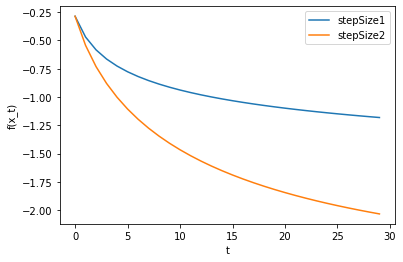

In [102]:
Q2,q2,xk2=run(2,2)

Q:  [[ 0.20271633 -0.04664195 -0.13745534  0.0746779 ]
 [-0.04664195  0.0544091  -0.02145853 -0.08075172]
 [-0.13745534 -0.02145853  0.71124912  0.16099962]
 [ 0.0746779  -0.08075172  0.16099962  0.15859747]]
q:  [ 0.0648057   0.44566087 -0.48420424 -0.09925895]
Eigenvalues:  [0.77894081+0.j 0.29047478+0.j 0.05522451+0.j 0.00233191+0.j]


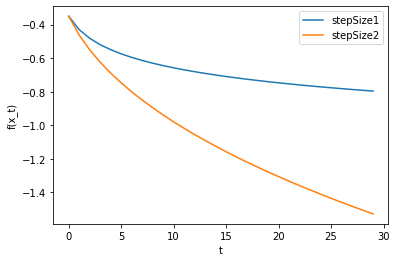

In [103]:
Q4,q4,xk4=run(4,1)

Q:  [[ 1.17812233  0.61266779  0.38944921]
 [ 0.61266779  0.44475587 -0.04362836]
 [ 0.38944921 -0.04362836  0.70354638]]
q:  [-0.85734096  0.45449221 -0.08923956]
Eigenvalues:  [1.63737042+0.j 0.01267645+0.j 0.6763777 +0.j]


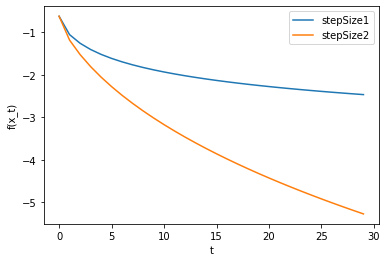

In [113]:
Q3,q3,xk3=run(3,2)

In [128]:
def update3(xk,Q,q,eta):
    def grad(x):
        return np.matmul(Q,x)+q
    return xk - eta*grad(xk)
def GD3(eta):
    Q,q = Q3, q3
    n_steps = 20
    fx3 = []
    xk = np.copy(xk3)
    tList = list(range(n_steps))
    label = "eta=" + str(eta)
    for i in tList:
        xk = update3(xk,Q,q,eta)
        fx3.append(f(xk, Q, q))
    plt.plot(tList,fx3)
    plt.xlabel("t")
    plt.ylabel("f(x_t)")
    plt.legend([label])

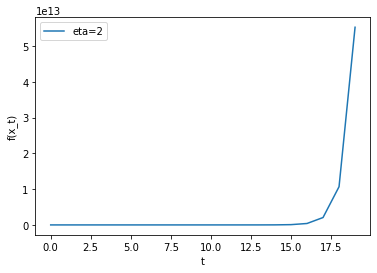

In [129]:
GD3(2)

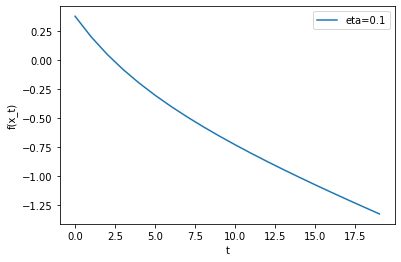

In [130]:
GD3(0.1)

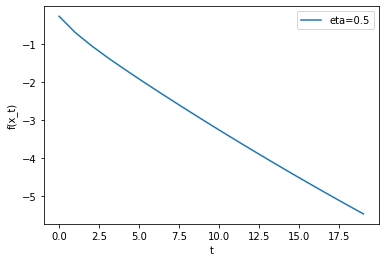

In [131]:
GD3(0.5)

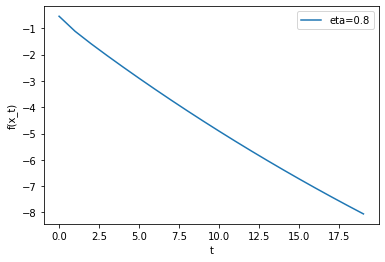

In [132]:
GD3(0.8)

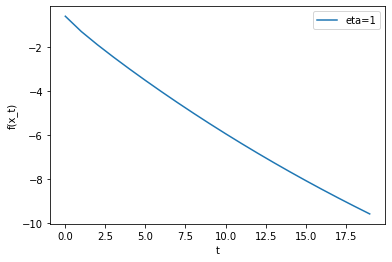

In [133]:
GD3(1)

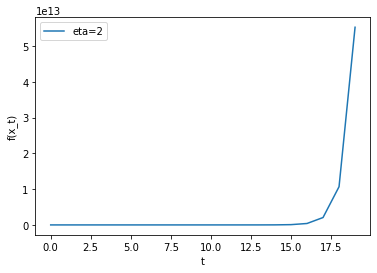

In [134]:
GD3(2)

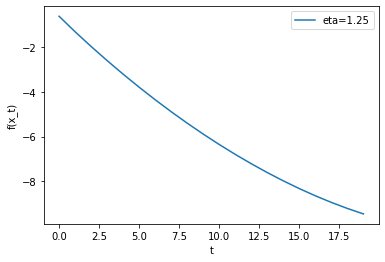

In [140]:
GD3(1.25)

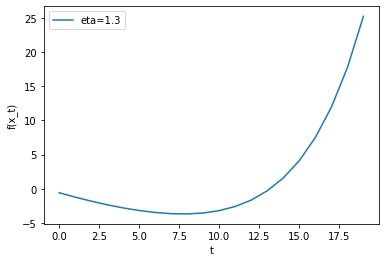

In [141]:
GD3(1.3)

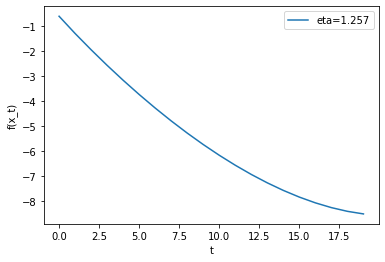

In [143]:
GD3(1.257)